In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model





#URL to player stats
player_stats_url = "https://fbref.com/en/share/NsKcV"



 
players_dfs = pd.read_html(player_stats_url)

players_df = players_dfs[0]
players_df.head(20)


Unnamed: 0_level_0      Unnamed: 1_level_0 Unnamed: 2_level_0   
                   Rk                  Player             Nation   
0                   1        Brenden Aaronson             us USA  \
1                   2               Che Adams            sct SCO   
2                   3             Tyler Adams             us USA   
3                   4        Tosin Adarabioyo            eng ENG   
4                   5            Nayef Aguerd             ma MAR   
5                   6        Naouirou Ahamada             fr FRA   
6                   7         Rayan Aït Nouri             dz ALG   
7                   8         Kristoffer Ajer             no NOR   
8                   9           Manuel Akanji             ch SUI   
9                  10              Nathan Aké             nl NED   
10                 11         Marc Albrighton            eng ENG   
11                 12        Thiago Alcántara             es ESP   
12                 13          Carlos Alcaraz             ar ARG   
13                 14  Trent Alexander-Arnold            eng ENG   
14                 15                 Alisson             br BRA   
15                 16               Dele Alli            eng ENG   
16                 17          Miguel Almirón             py PAR   
17                 18          Julián Álvarez             ar ARG   
18                 19          Daniel Amartey             gh GHA   
19                 20        Joachim Andersen             dk DEN   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0   
                  Pos              Squad                Age   
0               MF,FW       Leeds United             22-202  \
1                  FW        Southampton             26-303   
2                  MF       Leeds United             24-087   
3                  DF             Fulham             25-230   
4                  DF           West Ham             27-043   
5               MF,FW     Crystal Palace             21-044   
6                  DF             Wolves             21-340   
7                  DF          Brentford             25-025   
8                  DF    Manchester City             27-297   
9                  DF    Manchester City             28-083   
10              FW,MF     Leicester City             33-175   
11                 MF          Liverpool             32-031   
12              MF,FW        Southampton             20-163   
13                 DF          Liverpool             24-217   
14                 GK          Liverpool             30-222   
15                 MF            Everton             27-031   
16                 FW      Newcastle Utd             29-091   
17              FW,MF    Manchester City             23-101   
18                 DF     Leicester City             28-142   
19                 DF     Crystal Palace             26-346   

   Unnamed: 6_level_0 Playing Time               ... Per 90 Minutes         
                 Born           MP Starts   Min  ...            Ast   G+A   
0                2000           33     28  2307  ...           0.12  0.16  \
1                1996           28     23  1992  ...           0.14  0.36   
2                1999           24     24  2156  ...           0.00  0.00   
3                1997           22     20  1815  ...           0.00  0.05   
4                1996           16     15  1415  ...           0.00  0.13   
5                2002            7      0    93  ...           0.00  0.00   
6                2001           20      9  1031  ...           0.00  0.09   
7                1998            9      9   763  ...           0.00  0.00   
8                1995           27     22  2141  ...           0.04  0.04   
9                1995           25     21  1811  ...           0.00  0.05   
10               1989            6      1   237  ...           0.00  0.38   
11               1991           18     14  1254  ...           0.00  0.00   
12               2002           15     10

In [7]:
# Need to clean data

# Original dataframe uses multi indexing (columns with subcolumns), but we want only single columns. Use another dataframe
#We will omit the "per 90 minutes" stats and matches column
clean_players_df = pd.DataFrame()
clean_players_df["Player"] = players_df["Unnamed: 1_level_0"]['Player']
clean_players_df["Nation"] = players_df["Unnamed: 2_level_0"]['Nation']
clean_players_df["Pos"] = players_df["Unnamed: 3_level_0"]['Pos']
clean_players_df["Squad"] = players_df["Unnamed: 4_level_0"]['Squad']
clean_players_df["Age"] = players_df["Unnamed: 5_level_0"]['Age']
clean_players_df["Born"] = players_df["Unnamed: 6_level_0"]['Born']
clean_players_df["MP"] = players_df["Playing Time"]['MP']
clean_players_df["Starts"] = players_df["Playing Time"]['Starts']
clean_players_df["Min"] = players_df["Playing Time"]['Min']
clean_players_df["Gls"] = players_df["Performance"]['Gls']
clean_players_df["Ast"] = players_df["Performance"]['Ast']
clean_players_df["G+A"] = players_df["Performance"]['G+A']
clean_players_df["G-PK"] = players_df["Performance"]['G-PK']
clean_players_df["PK"] = players_df["Performance"]['PK']
clean_players_df["PKatt"] = players_df["Performance"]['PKatt']
clean_players_df["CrdY"] = players_df["Performance"]['CrdY']
clean_players_df["CrdR"] = players_df["Performance"]['CrdR']
clean_players_df["xG"] = players_df["Expected"]['xG']
clean_players_df["npxG"] = players_df["Expected"]['npxG']
clean_players_df["xAG"] = players_df["Expected"]['xAG']
clean_players_df["npxG+xAG"] = players_df["Expected"]['npxG+xAG']
clean_players_df["PrgC"] = players_df["Progression"]['PrgC']
clean_players_df["PrgP"] = players_df["Progression"]['PrgP']
clean_players_df["PrgR"] = players_df["Progression"]['PrgR']
clean_players_df["PrgR"] = players_df["Progression"]['PrgR']


# Now, to clean the formatting for the "Nation" column

clean_players_df['Nation'] = clean_players_df['Nation'].str[-3:]

clean_players_df.head(20)

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR
0,Brenden Aaronson,USA,"MF,FW",Leeds United,22-202,2000,33,28,2307,1,...,0,2,0,3.7,3.7,4.2,7.9,43,84,147
1,Che Adams,SCO,FW,Southampton,26-303,1996,28,23,1992,5,...,0,1,0,6.6,6.6,2.8,9.4,17,34,115
2,Tyler Adams,USA,MF,Leeds United,24-087,1999,24,24,2156,0,...,0,6,1,0.1,0.1,1.4,1.5,19,136,20
3,Tosin Adarabioyo,ENG,DF,Fulham,25-230,1997,22,20,1815,1,...,0,3,0,0.6,0.6,0.4,1.0,16,83,3
4,Nayef Aguerd,MAR,DF,West Ham,27-043,1996,16,15,1415,2,...,0,4,0,2.2,2.2,0.4,2.6,2,24,4
5,Naouirou Ahamada,FRA,"MF,FW",Crystal Palace,21-044,2002,7,0,93,0,...,0,1,0,0.2,0.2,0.1,0.2,1,2,11
6,Rayan Aït Nouri,ALG,DF,Wolves,21-340,2001,20,9,1031,1,...,0,4,0,0.7,0.7,1.0,1.7,30,43,76
7,Kristoffer Ajer,NOR,DF,Brentford,25-025,1998,9,9,763,0,...,0,0,0,0.0,0.0,0.0,0.1,10,31,12
8,Manuel Akanji,SUI,DF,Manchester City,27-297,1995,27,22,2141,0,...,0,2,0,1.3,1.3,0.4,1.7,23,103,12
9,Nathan Aké,NED,DF,Manchester City,28-083,1995,25,21,1811,1,...,0,2,0,1.6,1.6,0.6,2.2,25,139,30


In [8]:
#URL to player shooting statistics
shot_url = "https://fbref.com/en/share/UVdZj"

shot_dfs = pd.read_html(shot_url)
shot_df = shot_dfs[0]


shot_df.head(20)

Unnamed: 0_level_0      Unnamed: 1_level_0 Unnamed: 2_level_0   
                   Rk                  Player             Nation   
0                   1        Brenden Aaronson             us USA  \
1                   2               Che Adams            sct SCO   
2                   3             Tyler Adams             us USA   
3                   4        Tosin Adarabioyo            eng ENG   
4                   5            Nayef Aguerd             ma MAR   
5                   6        Naouirou Ahamada             fr FRA   
6                   7         Rayan Aït Nouri             dz ALG   
7                   8         Kristoffer Ajer             no NOR   
8                   9           Manuel Akanji             ch SUI   
9                  10              Nathan Aké             nl NED   
10                 11         Marc Albrighton            eng ENG   
11                 12        Thiago Alcántara             es ESP   
12                 13          Carlos Alcaraz             ar ARG   
13                 14  Trent Alexander-Arnold            eng ENG   
14                 15                 Alisson             br BRA   
15                 16               Dele Alli            eng ENG   
16                 17          Miguel Almirón             py PAR   
17                 18          Julián Álvarez             ar ARG   
18                 19          Daniel Amartey             gh GHA   
19                 20        Joachim Andersen             dk DEN   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0   
                  Pos              Squad                Age   
0               MF,FW       Leeds United             22-202  \
1                  FW        Southampton             26-303   
2                  MF       Leeds United             24-087   
3                  DF             Fulham             25-230   
4                  DF           West Ham             27-043   
5               MF,FW     Crystal Palace             21-044   
6                  DF             Wolves             21-340   
7                  DF          Brentford             25-025   
8                  DF    Manchester City             27-297   
9                  DF    Manchester City             28-083   
10              FW,MF     Leicester City             33-175   
11                 MF          Liverpool             32-031   
12              MF,FW        Southampton             20-163   
13                 DF          Liverpool             24-217   
14                 GK          Liverpool             30-222   
15                 MF            Everton             27-031   
16                 FW      Newcastle Utd             29-091   
17              FW,MF    Manchester City             23-101   
18                 DF     Leicester City             28-142   
19                 DF     Crystal Palace             26-346   

   Unnamed: 6_level_0 Unnamed: 7_level_0 Standard      ...                     
                 Born                90s      Gls  Sh  ...  Dist FK PK PKatt   
0                2000               25.6        1  40  ...  18.5  2  0     0  \
1                1996               22.1        5  47  ...  13.8  0  0     0   
2                1999               24.0        0   4  ...  27.5  0  0     0   
3                1997               20.2        1  12  ...  19.8  1  0     0   
4                1996               15.7        2  11  ...   9.8  0  0     0   
5                2002                1.0        0   3  ...  15.9  0  0     0   
6                2001               11.5        1  10  ...  14.1  0  0     0   
7                1998                8.5        0   1  ...   6.0  0  0     0   
8                1995               23.8        0  15  ...  15.9  0  0     0   
9                1995               20.1        1   9  ...  10.5  0  0     0   
10               1989                2.6        1   2  ...   8.0  0  0     0   
11               1991               13.9        0  10  ...  24.1  0  0     0   

In [9]:
# The stats we'll take from this table and add to clean_players_df are Sh, SoT, G/Sh, G/SoT, Dist, FK, PK, and PKatt

clean_players_df['Sh'] = shot_df['Standard']['Sh']
clean_players_df['SoT'] = shot_df['Standard']['SoT']
clean_players_df['G/Sh'] = shot_df['Standard']['G/Sh']
clean_players_df['Dist'] = shot_df['Standard']['Dist']
clean_players_df['FK'] = shot_df['Standard']['FK']
clean_players_df['PK'] = shot_df['Standard']['PK']
clean_players_df['PKatt'] = shot_df['Standard']['PKatt']

clean_players_df.head(20)

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,xAG,npxG+xAG,PrgC,PrgP,PrgR,Sh,SoT,G/Sh,Dist,FK
0,Brenden Aaronson,USA,"MF,FW",Leeds United,22-202,2000,33,28,2307,1,...,4.2,7.9,43,84,147,40,9,0.03,18.5,2
1,Che Adams,SCO,FW,Southampton,26-303,1996,28,23,1992,5,...,2.8,9.4,17,34,115,47,14,0.11,13.8,0
2,Tyler Adams,USA,MF,Leeds United,24-087,1999,24,24,2156,0,...,1.4,1.5,19,136,20,4,0,0.00,27.5,0
3,Tosin Adarabioyo,ENG,DF,Fulham,25-230,1997,22,20,1815,1,...,0.4,1.0,16,83,3,12,4,0.08,19.8,1
4,Nayef Aguerd,MAR,DF,West Ham,27-043,1996,16,15,1415,2,...,0.4,2.6,2,24,4,11,2,0.18,9.8,0
5,Naouirou Ahamada,FRA,"MF,FW",Crystal Palace,21-044,2002,7,0,93,0,...,0.1,0.2,1,2,11,3,0,0.00,15.9,0
6,Rayan Aït Nouri,ALG,DF,Wolves,21-340,2001,20,9,1031,1,...,1.0,1.7,30,43,76,10,5,0.10,14.1,0
7,Kristoffer Ajer,NOR,DF,Brentford,25-025,1998,9,9,763,0,...,0.0,0.1,10,31,12,1,0,0.00,6.0,0
8,Manuel Akanji,SUI,DF,Manchester City,27-297,1995,27,22,2141,0,...,0.4,1.7,23,103,12,15,2,0.00,15.9,0
9,Nathan Aké,NED,DF,Manchester City,28-083,1995,25,21,1811,1,...,0.6,2.2,25,139,30,9,2,0.11,10.5,0


In [10]:
#URL to salaries for players
salary_url = "https://fbref.com/en/share/OAXlI"
salary_dfs = pd.read_html(salary_url)
salary_df = salary_dfs[0]
salary_df.head(20)

,Rk,Player,Nation,Pos,Squad,Age,Weekly Wages,Annual Wages,Notes
0,1,Cristiano Ronaldo,pt POR,FW,Manchester Utd,37,"£ 515,000 (€ 583,130, $619,550)","£ 26,780,000 (€ 30,322,734, $32,216,592)",NaN
1,2,Kevin De Bruyne,be BEL,MF,Manchester City,31,"£ 400,000 (€ 452,916, $481,204)","£ 20,800,000 (€ 23,551,638, $25,022,596)",NaN
2,3,David de Gea,es ESP,GK,Manchester Utd,31,"£ 375,000 (€ 424,609, $451,129)","£ 19,500,000 (€ 22,079,661, $23,458,683)",NaN
3,4,Erling Haaland,no NOR,FW,Manchester City,22,"£ 375,000 (€ 424,609, $451,129)","£ 19,500,000 (€ 22,079,661, $23,458,683)",NaN
4,5,Jadon Sancho,eng ENG,"FW,MF",Manchester Utd,22,"£ 350,000 (€ 396,302, $421,053)","£ 18,200,000 (€ 20,607,683, $21,894,771)",NaN
5,6,Mohamed Salah,eg EGY,FW,Liverpool,30,"£ 350,000 (€ 396,302, $421,053)","£ 18,200,000 (€ 20,607,683, $21,894,771)",NaN
6,7,Raphaël Varane,fr FRA,DF,Manchester Utd,29,"£ 340,000 (€ 384,979, $409,023)","£ 17,680,000 (€ 20,018,893, $21,269,206)",NaN
7,8,Raheem Sterling,eng ENG,"FW,MF",Chelsea,27,"£ 325,000 (€ 367,994, $390,978)","£ 16,900,000 (€ 19,135,706, $20,330,859)",NaN
8,9,Casemiro,br BRA,MF,Manchester Utd,30,"£ 300,000 (€ 339,687, $360,903)","£ 15,600,000 (€ 17,663,729, $18,766,947)",Unverified estimation
9,10,Jack Grealish,eng ENG,FW,Manchester City,26,"£ 300,000 (€ 339,687, $360,903)","£ 15,600,000 (€ 17,663,729, $18,766,947)",NaN


In [11]:
salary_df = salary_df.drop('Nation', axis=1)
salary_df = salary_df.drop('Pos', axis=1)
salary_df = salary_df.drop('Squad', axis=1)
salary_df = salary_df.drop('Age', axis=1)
salary_df = salary_df.drop('Weekly Wages', axis=1)
salary_df = salary_df.drop('Notes', axis=1)
salary_df = salary_df.drop('Rk', axis=1)

salary_df.head(20)

,Player,Annual Wages
0,Cristiano Ronaldo,"£ 26,780,000 (€ 30,322,734, $32,216,592)"
1,Kevin De Bruyne,"£ 20,800,000 (€ 23,551,638, $25,022,596)"
2,David de Gea,"£ 19,500,000 (€ 22,079,661, $23,458,683)"
3,Erling Haaland,"£ 19,500,000 (€ 22,079,661, $23,458,683)"
4,Jadon Sancho,"£ 18,200,000 (€ 20,607,683, $21,894,771)"
5,Mohamed Salah,"£ 18,200,000 (€ 20,607,683, $21,894,771)"
6,Raphaël Varane,"£ 17,680,000 (€ 20,018,893, $21,269,206)"
7,Raheem Sterling,"£ 16,900,000 (€ 19,135,706, $20,330,859)"
8,Casemiro,"£ 15,600,000 (€ 17,663,729, $18,766,947)"
9,Jack Grealish,"£ 15,600,000 (€ 17,663,729, $18,766,947)"


In [12]:
import re

def get_usd(x):
    match = re.search(r'\$([\d,]+)', x)
    if match:
        return float(match.group(1).replace(',', ''))
    else:
        return None

salary_df['Annual Wages ($)'] = salary_df['Annual Wages'].apply(get_usd)
salary_df.head(20)

,Player,Annual Wages,Annual Wages ($)
0,Cristiano Ronaldo,"£ 26,780,000 (€ 30,322,734, $32,216,592)",32216592.0
1,Kevin De Bruyne,"£ 20,800,000 (€ 23,551,638, $25,022,596)",25022596.0
2,David de Gea,"£ 19,500,000 (€ 22,079,661, $23,458,683)",23458683.0
3,Erling Haaland,"£ 19,500,000 (€ 22,079,661, $23,458,683)",23458683.0
4,Jadon Sancho,"£ 18,200,000 (€ 20,607,683, $21,894,771)",21894771.0
5,Mohamed Salah,"£ 18,200,000 (€ 20,607,683, $21,894,771)",21894771.0
6,Raphaël Varane,"£ 17,680,000 (€ 20,018,893, $21,269,206)",21269206.0
7,Raheem Sterling,"£ 16,900,000 (€ 19,135,706, $20,330,859)",20330859.0
8,Casemiro,"£ 15,600,000 (€ 17,663,729, $18,766,947)",18766947.0
9,Jack Grealish,"£ 15,600,000 (€ 17,663,729, $18,766,947)",18766947.0


In [13]:
# do inner join to merge the two tables
merged_player_df = pd.merge(clean_players_df, salary_df, on='Player', how='inner')
merged_player_df = merged_player_df.drop_duplicates(subset='Player', keep='first')
merged_player_df = merged_player_df[~merged_player_df['Pos'].str.contains('Pos')]
merged_player_df = merged_player_df[~merged_player_df['Squad'].str.contains('Squad')]

# change to int or float for data processing
merged_player_df['Born'] = merged_player_df['Gls'].astype(int)
merged_player_df['MP'] = merged_player_df['MP'].astype(int)
merged_player_df['Starts'] = merged_player_df['Starts'].astype(int)
merged_player_df['Min'] = merged_player_df['Min'].astype(int)
merged_player_df['Gls'] = merged_player_df['Gls'].astype(int)
merged_player_df['Ast'] = merged_player_df['Ast'].astype(int)
merged_player_df['G+A'] = merged_player_df['G+A'].astype(int)
merged_player_df['G-PK'] = merged_player_df['G-PK'].astype(int)
merged_player_df['PK'] = merged_player_df['PK'].astype(int)
merged_player_df['PKatt'] = merged_player_df['PKatt'].astype(int)
merged_player_df['CrdY'] = merged_player_df['CrdY'].astype(int)
merged_player_df['CrdR'] = merged_player_df['CrdR'].astype(int)
merged_player_df['PrgC'] = merged_player_df['PrgC'].astype(float)
merged_player_df['PrgP'] = merged_player_df['PrgP'].astype(float)
merged_player_df['PrgR'] = merged_player_df['PrgR'].astype(float)
merged_player_df['Sh'] = merged_player_df['Sh'].astype(int)
merged_player_df['SoT'] = merged_player_df['SoT'].astype(int)
merged_player_df['G/Sh'] = merged_player_df['G/Sh'].astype(float)
merged_player_df['Dist'] = merged_player_df['Dist'].astype(float)
merged_player_df['FK'] = merged_player_df['FK'].astype(int)
merged_player_df['PK'] = merged_player_df['PK'].astype(int)
merged_player_df['PKatt'] = merged_player_df['PKatt'].astype(int)
merged_player_df.head(20)

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,PrgC,PrgP,PrgR,Sh,SoT,G/Sh,Dist,FK,Annual Wages,Annual Wages ($)
0,Brenden Aaronson,USA,"MF,FW",Leeds United,22-202,1,33,28,2307,1,...,43.0,84.0,147.0,40,9,0.03,18.5,2,"£ 2,340,000 (€ 2,649,559, $2,815,042)",2815042.0
1,Che Adams,SCO,FW,Southampton,26-303,5,28,23,1992,5,...,17.0,34.0,115.0,47,14,0.11,13.8,0,"£ 1,560,000 (€ 1,766,373, $1,876,695)",1876695.0
2,Tyler Adams,USA,MF,Leeds United,24-087,0,24,24,2156,0,...,19.0,136.0,20.0,4,0,0.00,27.5,0,"£ 2,860,000 (€ 3,238,350, $3,440,607)",3440607.0
3,Tosin Adarabioyo,ENG,DF,Fulham,25-230,1,22,20,1815,1,...,16.0,83.0,3.0,12,4,0.08,19.8,1,"£ 2,080,000 (€ 2,355,164, $2,502,260)",2502260.0
4,Nayef Aguerd,MAR,DF,West Ham,27-043,2,16,15,1415,2,...,2.0,24.0,4.0,11,2,0.18,9.8,0,"£ 2,600,000 (€ 2,943,955, $3,127,824)",3127824.0
5,Rayan Aït Nouri,ALG,DF,Wolves,21-340,1,20,9,1031,1,...,30.0,43.0,76.0,10,5,0.10,14.1,0,"£ 520,000 (€ 588,791, $625,565)",625565.0
6,Kristoffer Ajer,NOR,DF,Brentford,25-025,0,9,9,763,0,...,10.0,31.0,12.0,1,0,0.00,6.0,0,"£ 1,820,000 (€ 2,060,768, $2,189,477)",2189477.0
7,Manuel Akanji,SUI,DF,Manchester City,27-297,0,27,22,2141,0,...,23.0,103.0,12.0,15,2,0.00,15.9,0,"£ 9,360,000 (€ 10,598,237, $11,260,168)",11260168.0
8,Nathan Aké,NED,DF,Manchester City,28-083,1,25,21,1811,1,...,25.0,139.0,30.0,9,2,0.11,10.5,0,"£ 4,680,000 (€ 5,299,119, $5,630,084)",5630084.0
9,Marc Albrighton,ENG,"FW,MF",Leicester City,33-175,1,6,1,237,1,...,4.0,7.0,18.0,2,1,0.50,8.0,0,"£ 2,340,000 (€ 2,649,559, $2,815,042)",2815042.0


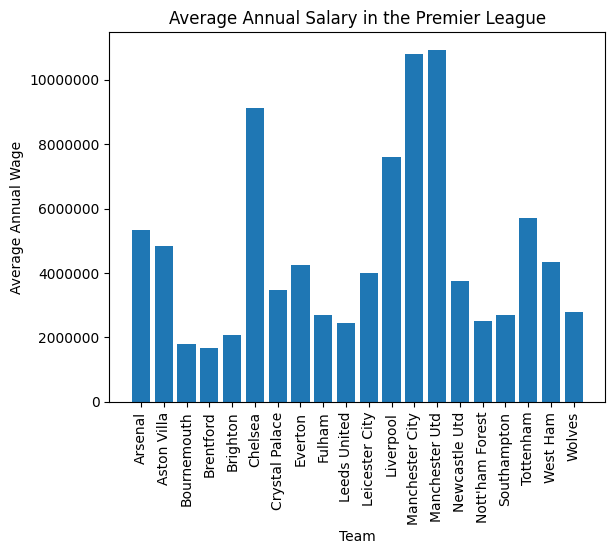

In [14]:

# Now let's do some visualization of the data

# First visualization: Average salary for every team in the English Premier League

salaries = merged_player_df.groupby('Squad')['Annual Wages ($)'].mean()
fig, ax = plt.subplots()
plt.bar(salaries.index, salaries.values)
plt.title("Average Annual Salary in the Premier League")
plt.xlabel('Team')
plt.ylabel('Average Annual Wage')
# rotate x-axis labels
plt.xticks(rotation=90)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()


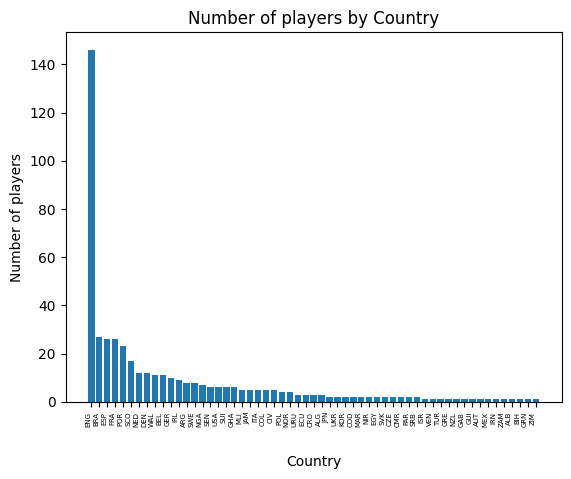

In [15]:
# Next, let's visualize the number of players by nation

num_by_nation = merged_player_df['Nation'].value_counts()
plt.bar(num_by_nation.index, num_by_nation.values)
plt.title('Number of players by Country')
plt.xlabel('Country' , labelpad=20)
plt.ylabel('Number of players')

# rotate x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=5)


plt.show()


In [16]:
# It's no surprise that England has the most players in the Premier league. Brazil follows second, then France.

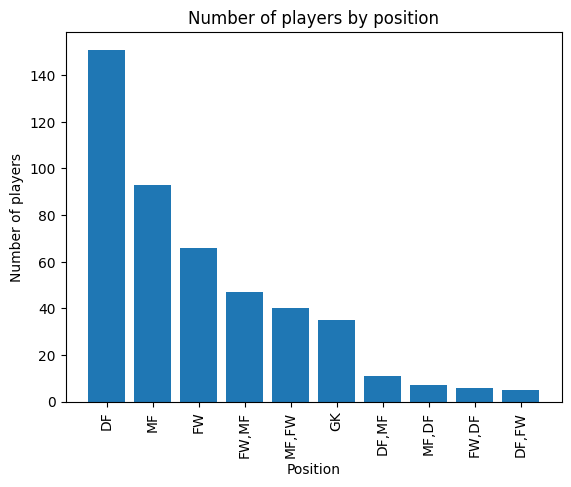

In [17]:
# Next, let's visualize the amount of players per position.
num_by_position = merged_player_df['Pos'].value_counts()

plt.bar(num_by_position.index, num_by_position.values)
plt.title('Number of players by position')
plt.xlabel('Position')
plt.ylabel('Number of players')

# rotate x-axis labels
plt.xticks(rotation=90)


plt.show()

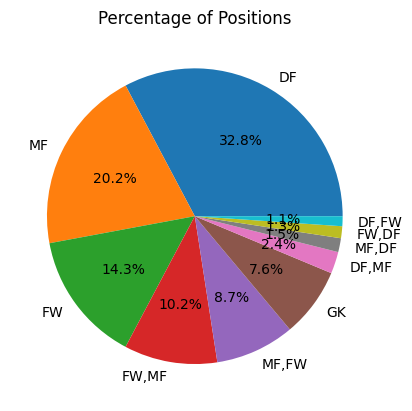

In [18]:
# We can also make a pie chart of the amount of players per position 
plt.pie(num_by_position.values, labels=num_by_position.index, autopct='%1.1f%%')
plt.title('Percentage of Positions')
plt.show()

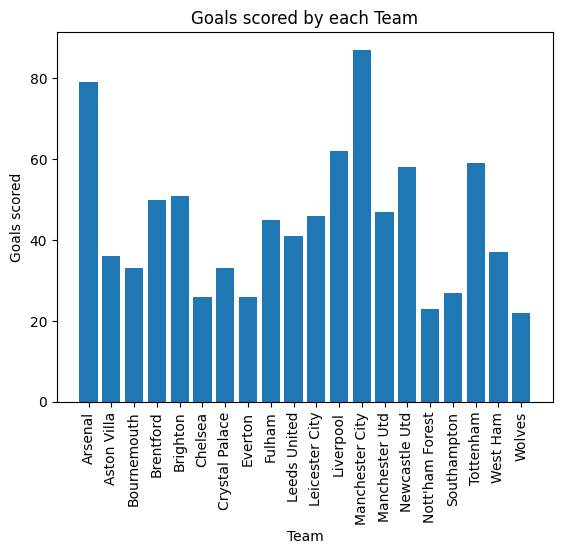

In [19]:
goals_by_team = merged_player_df.groupby('Squad')['Gls'].sum()
plt.bar(goals_by_team.index, goals_by_team.values)
plt.title('Goals scored by each Team')
plt.xlabel('Team')
plt.ylabel('Goals scored')
plt.xticks(rotation=90)

plt.show()

In [20]:
# pd.get_dummies(merged_player_df, columns=['Pos'])

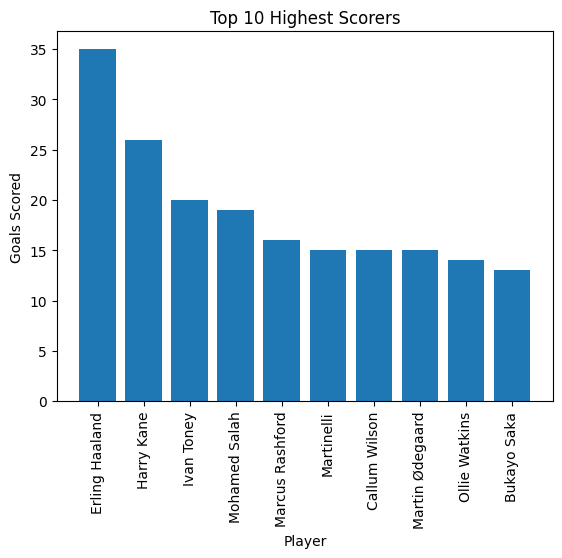

In [21]:
# Let's see the top 10 scorers in the premier league
top_scorers = merged_player_df.sort_values(by='Gls', ascending=False)

top_scorers = top_scorers[:10]

plt.bar(top_scorers['Player'], top_scorers['Gls'])
plt.xlabel('Player')
plt.ylabel('Goals Scored')
plt.title('Top 10 Highest Scorers')
plt.xticks(rotation=90)
plt.show()


In [25]:
# Now let's do a multiple linear regression to predict the wages using multiple statistics

X = merged_player_df[['Born', 'MP', 'Starts', 'Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR', 'Sh', 'SoT']]
y = merged_player_df['Annual Wages ($)']

regr = linear_model.LinearRegression()
model = regr.fit(X, y)
print(regr.coef_)


[109881.22899593 -83443.3801977   55766.08936456 109881.22899593
 349595.62939106 -15556.39932725  14956.05393275   5601.03564031
   2674.88740875 -16687.78828204]


In [26]:
# r-squared value. It is between 0 and 1. The cloer it is to 1, the better the model.
print(regr.score(X, y))

0.15176027981627727
